In [1]:
import pandas as pd
import matplotlib.pyplot as plty
import numpy as np

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split


import plotly.express as px

from sklearn.metrics import classification_report



In [2]:
#MLR = LinearRegression()

In [3]:
dataset=pd.read_csv('Scaled_BreastCancer_Data.csv')
dataset

,Unnamed: 0,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0.0
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0.0
2,2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0.0
3,3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0.0
4,4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0.0
565,565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0.0
566,566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0.0
567,567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0.0


In [4]:
del dataset["Unnamed: 0"]

In [5]:
#map "malignant,m' to 0 and 'Benign, B' to '1'
#dataset['diagnosis'] = dataset['diagnosis'].map({'M': 0, 'B': 1}).astype(float)

In [6]:
#let's drop the diagnosis and id to define data feature 
X=dataset.drop(['Target'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [7]:
y=dataset['Target']

In [8]:
GB = GradientBoostingClassifier(learning_rate=0.1)
GB.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [10]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5,max_depth=1, random_state=1).fit(X_train, y_train)

In [11]:
y_pred=clf.predict(X_test)
y_pred

array([1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

In [12]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
408,1.097064,0.318890,1.063983,0.957925,0.515218,0.493857,0.392979,1.014241,0.658562,-0.298776,...,0.996235,-0.043516,0.918559,0.823436,0.693984,0.758501,0.277832,1.260668,0.257622,0.060081
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
307,-1.456224,-1.137854,-1.466743,-1.162069,-1.872383,-1.386888,-1.068658,-1.172263,-0.086230,0.784274,...,-1.360572,-0.913101,-1.380908,-1.046104,-1.479838,-1.284653,-1.235211,-1.533565,0.145995,-0.327276
386,-0.544538,-1.209993,-0.543259,-0.548596,-1.087428,-0.494842,-0.256238,-0.608200,-0.604664,-0.178279,...,-0.650071,-1.040120,-0.584136,-0.616470,-1.304933,-0.071025,0.169888,-0.353352,-0.361988,0.237966
404,-0.507616,-1.009865,-0.563442,-0.528403,-0.678938,-1.111144,-0.850089,-0.732011,-0.878485,-0.810531,...,-0.639717,-1.437458,-0.689578,-0.610845,-1.208494,-1.188468,-1.069745,-1.015252,-0.975127,-1.341385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1.608290,1.356762,1.582979,1.527599,0.365770,1.033974,2.080367,1.701909,1.425260,-0.236401,...,1.317213,1.286918,1.234289,1.245335,-0.213419,0.838655,1.415804,0.892184,0.653979,0.039023
144,-0.959199,-1.005211,-0.976580,-0.852062,-1.311599,-1.003499,-0.832260,-1.058692,-1.506447,-0.838883,...,-0.894429,-0.807253,-0.877825,-0.772397,-1.085753,-0.839482,-0.837832,-1.225379,-0.971891,-0.900829
72,0.872693,1.217138,0.915698,0.780737,0.764297,1.490705,1.009428,0.787254,0.421251,0.293783,...,1.460100,1.326001,1.320668,1.407063,1.145493,3.086136,1.844223,1.146468,0.666921,2.768252
235,-0.027632,0.456187,-0.089755,-0.146440,-0.402816,-0.661236,-0.931319,-0.772766,-1.075636,-0.630495,...,-0.194490,0.749534,-0.267811,-0.290202,-0.160816,-0.655002,-1.006897,-0.532569,-1.091607,-0.430903


In [13]:
 clf.score(X_test, y_test)*100

94.73684210526315

In [14]:
y_predicted_train = clf.predict(X_train)
y_predicted_test = clf.predict(X_test)

In [15]:
y_predicted_train

array([0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1.

In [16]:
fig = px.scatter(y_test,y_pred,color='Target',size_max=60)
fig.show()

In [17]:
#confusion_matrix 

from sklearn.metrics import confusion_matrix 
import seaborn as sns

cm=confusion_matrix(y_test,y_pred)

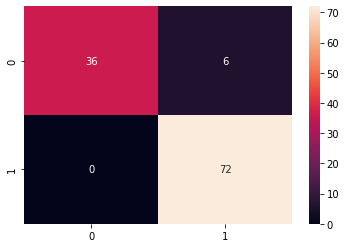

In [18]:
sns.heatmap(cm,annot=True,fmt='g')

In [19]:
y_predicted_train = clf.predict(X_train)
y_predicted_test = clf.predict(X_test)

In [20]:
y_train

408    0.0
4      0.0
307    1.0
386    1.0
404    1.0
      ... 
129    0.0
144    1.0
72     0.0
235    1.0
37     1.0
Name: Target, Length: 455, dtype: float64

In [21]:
y_test

421    1.0
47     0.0
292    1.0
186    0.0
414    0.0
      ... 
172    0.0
3      0.0
68     1.0
448    1.0
442    1.0
Name: Target, Length: 114, dtype: float64

In [22]:
y_predicted_train

array([0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1.

In [23]:
y_predicted_test

array([1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

In [24]:
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score 


accuracy_train = accuracy_score(y_train, y_predicted_train)
print("Training Accuracy for Gradient Boosted  Model: ", accuracy_train*100)

accuracy_test = accuracy_score(y_test, y_predicted_test)
print("Testing Accuracy for Gradient Boosted Model: ", accuracy_test*100)

Training Accuracy for Gradient Boosted  Model:  100.0
Testing Accuracy for Gradient Boosted Model:  94.73684210526315
